In [21]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [155]:
summary = pd.read_csv("../data/summary.csv",
                     index_col = ["driver_gender", "driver_race", "officer_race", "stop_outcome", "year", "search_conducted"],
                     dtype = {"driver_gender" : "category", "driver_race" : "category",
                            "officer_race" : "category", "stop_outcome" : "category", "count" : "float64",
                             "search_conducted" : "category"})

In [156]:
summary.reset_index().groupby("driver_race").sum()

,year,count
driver_race,,
Black,2702112,2783455.0
Hispanic,2702112,339337.0
Other,2702112,91093.0
White,2702112,5220663.0


Text(0.5,1,'Total Stops over Time')

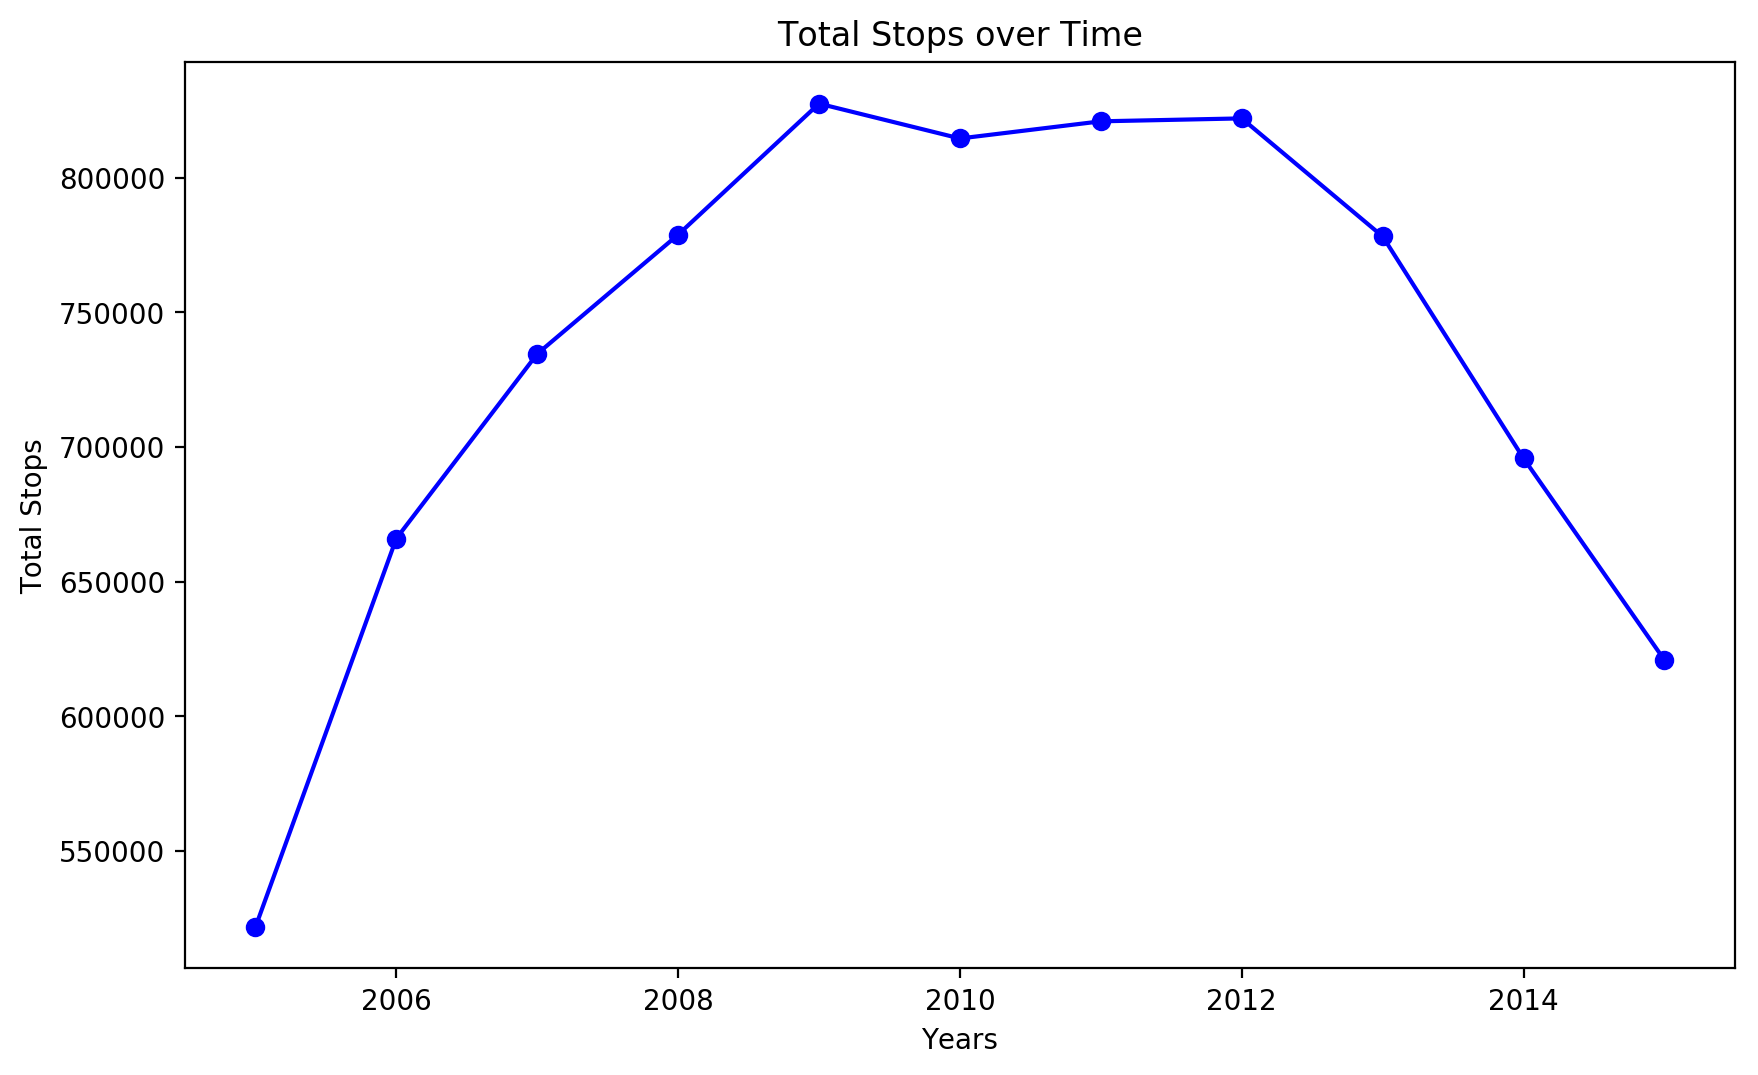

In [157]:
year_totals = summary.reset_index().groupby("year").sum().reset_index()[:11]
fig, ax = plt.subplots(figsize=(10, 6), dpi=200)
ax.plot(year_totals["year"], year_totals["count"], "bo-")
ax.set_xlabel("Years")
ax.set_ylabel("Total Stops")
ax.set_title("Total Stops over Time")
#.plot(kwds={"xlabel":"Year", "ylabel":"Total Stops", "title":"Total Stops over Time"},
 #                                                kind="line")

In [130]:
fig.savefig("../output/year_totals.png")

Text(0.5,1,'Traffic Stops by Outcome Over Time')

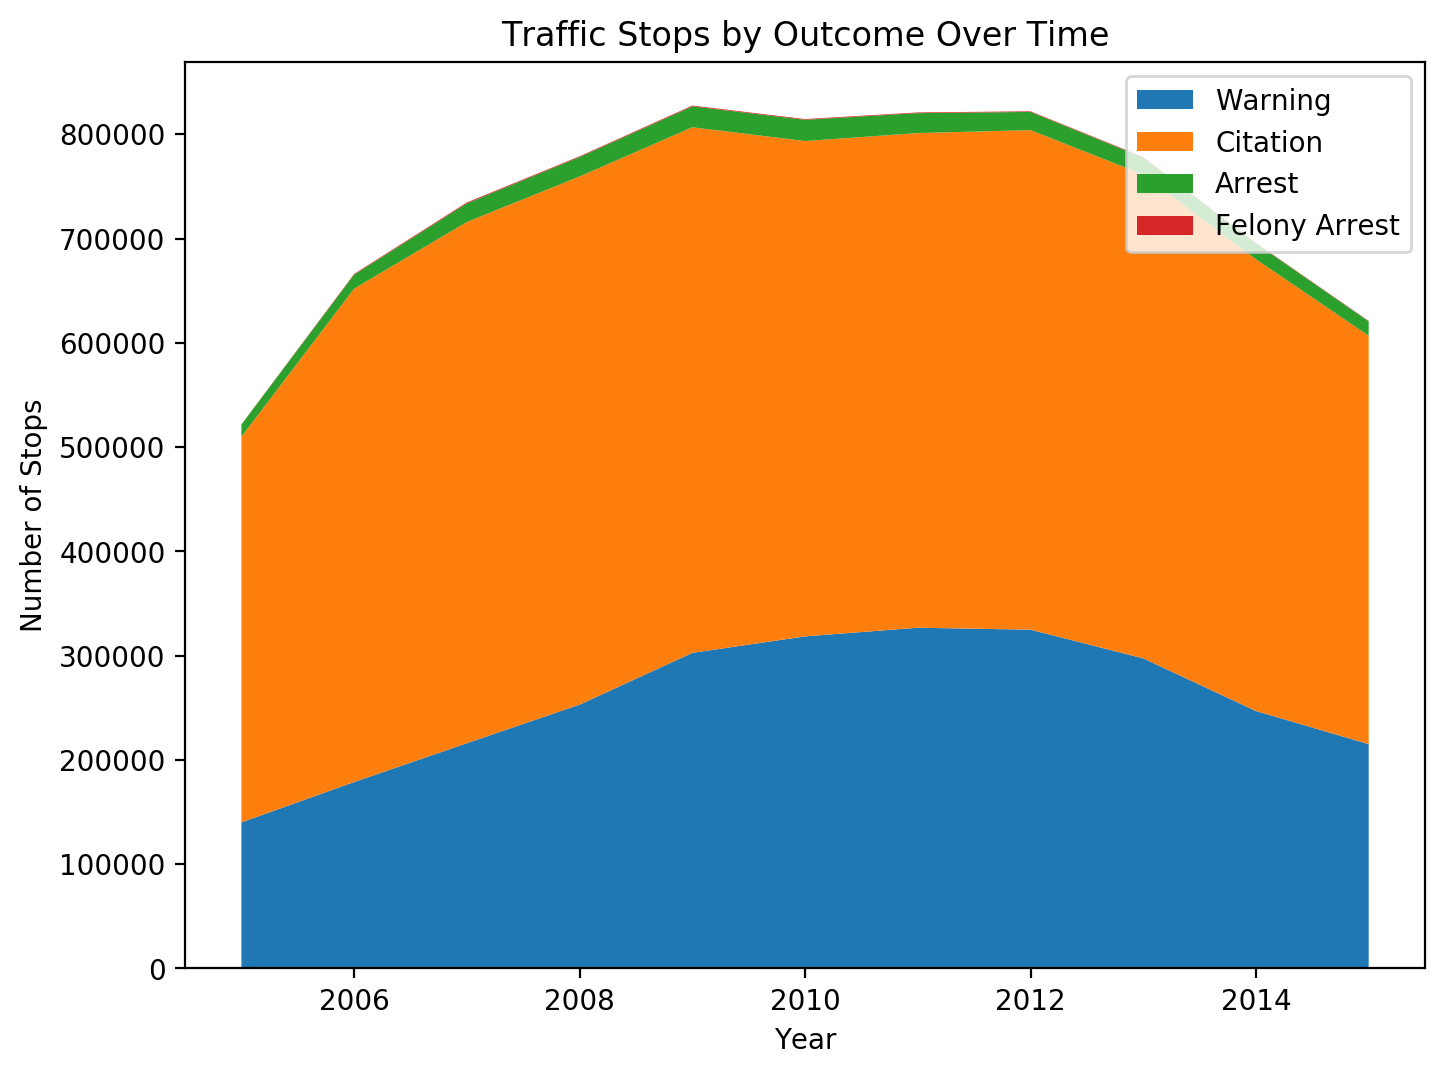

In [199]:
outcome_year_totals = summary.reset_index().groupby(["year", "stop_outcome"]).sum().unstack()[:-1]
outcome_year_totals.columns = outcome_year_totals.columns.droplevel()
x = outcome_year_totals.index
ys = [outcome_year_totals[colname] for colname in ["Warning", "Citation", "Arrest", "Felony Arrest"]]
fig, ax = plt.subplots(figsize=(8,6), dpi=200)
ax.stackplot(x, *ys)
ax.legend(["Warning", "Citation", "Arrest", "Felony Arrest"])
ax.set_xlabel("Year")
ax.set_ylabel("Number of Stops")
ax.set_title("Traffic Stops by Outcome Over Time")

In [200]:
fig.savefig("../output/year_type_graph.png", bbox_inches="tight")

Text(0.5,1,'Traffic Stops by Race Over Time')

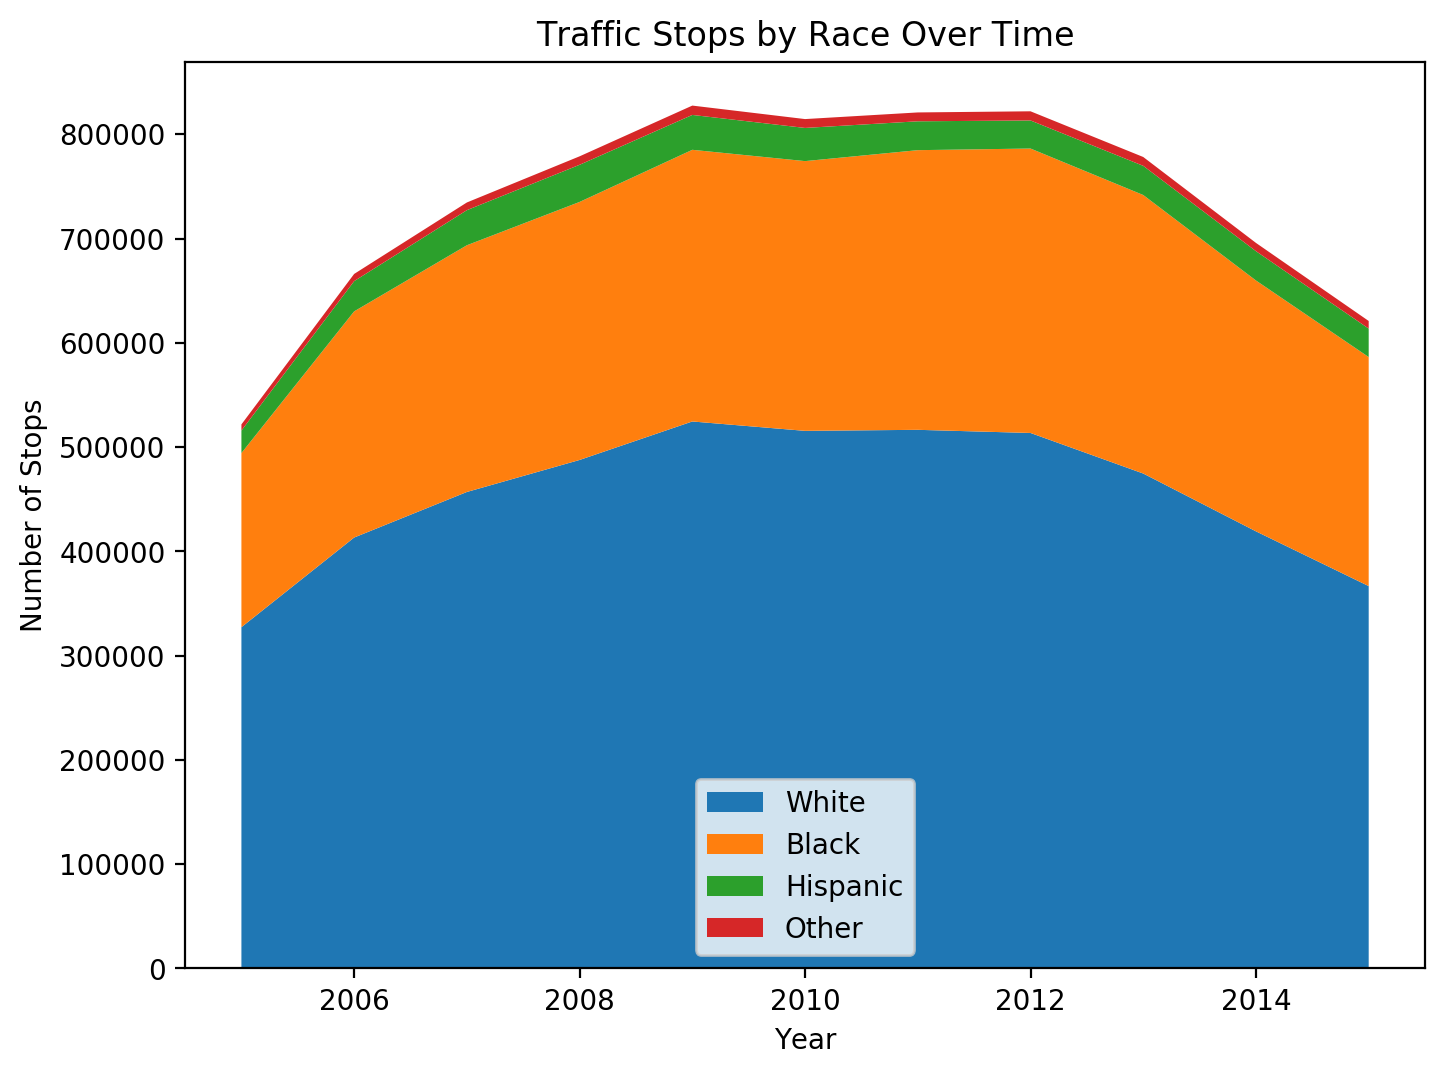

In [201]:
outcome_year_totals = summary.reset_index().groupby(["year", "driver_race"]).sum().unstack()[:-1]
outcome_year_totals.columns = outcome_year_totals.columns.droplevel()
x = outcome_year_totals.index
ys = [outcome_year_totals[colname] for colname in ["White", "Black", "Hispanic", "Other"]]
fig, ax = plt.subplots(figsize=(8,6), dpi=200)
ax.stackplot(x, *ys)
ax.legend(["White", "Black", "Hispanic", "Other"], loc=8)
ax.set_xlabel("Year")
ax.set_ylabel("Number of Stops")
ax.set_title("Traffic Stops by Race Over Time")

In [202]:
fig.savefig("../output/year_race_graph.png", bbox_inches="tight")

Text(0.5,1,'Arrests by Race Over Time')

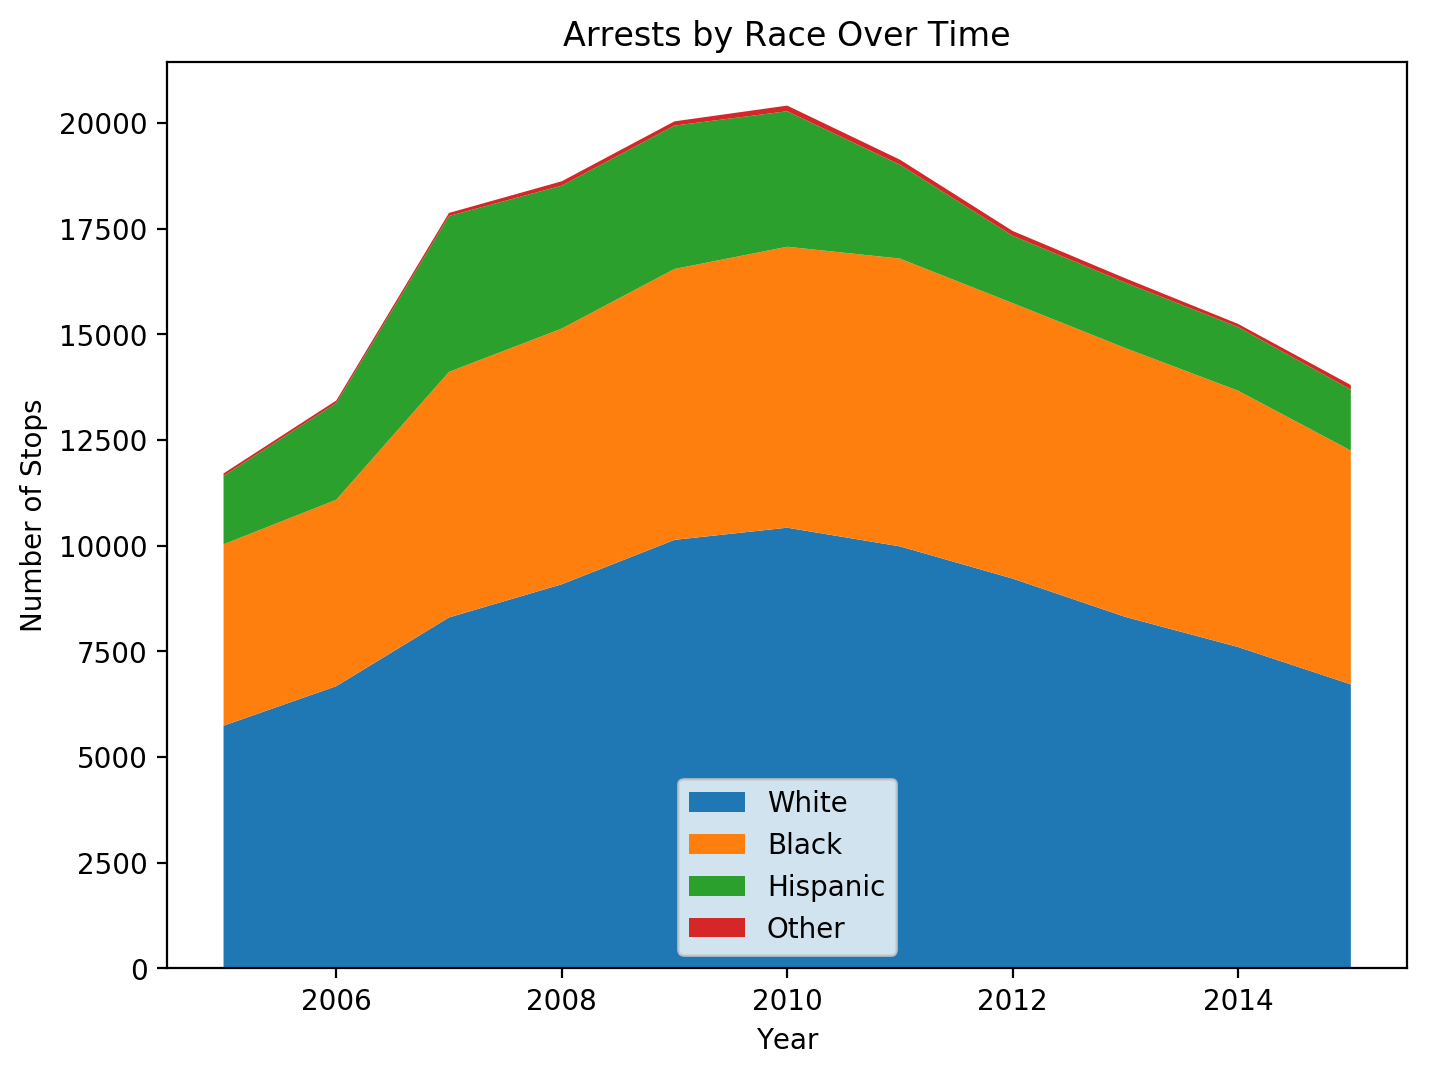

In [203]:
arrest_race_year = summary.reset_index().groupby(["stop_outcome", "driver_race", "year"]).sum().unstack().unstack()[0:1]
arrest_race_year = arrest_race_year.stack().stack()
arrest_race_year = arrest_race_year.reset_index().groupby(["year", "driver_race"]).sum().unstack()[:-1]
arrest_race_year.columns = arrest_race_year.columns.droplevel()
x = arrest_race_year.index
ys = [arrest_race_year[colname] for colname in ["White", "Black", "Hispanic", "Other"]]
fig, ax = plt.subplots(figsize=(8, 6), dpi=200)
ax.stackplot(x, *ys)
ax.legend(["White", "Black", "Hispanic", "Other"], loc=8)
ax.set_xlabel("Year")
ax.set_ylabel("Number of Stops")
ax.set_title("Arrests by Race Over Time")

In [204]:
fig.savefig("../output/year_arrest_race_graph.png", bbox_inches="tight")

Text(0.5,1,'Stop Outcomes by Race')

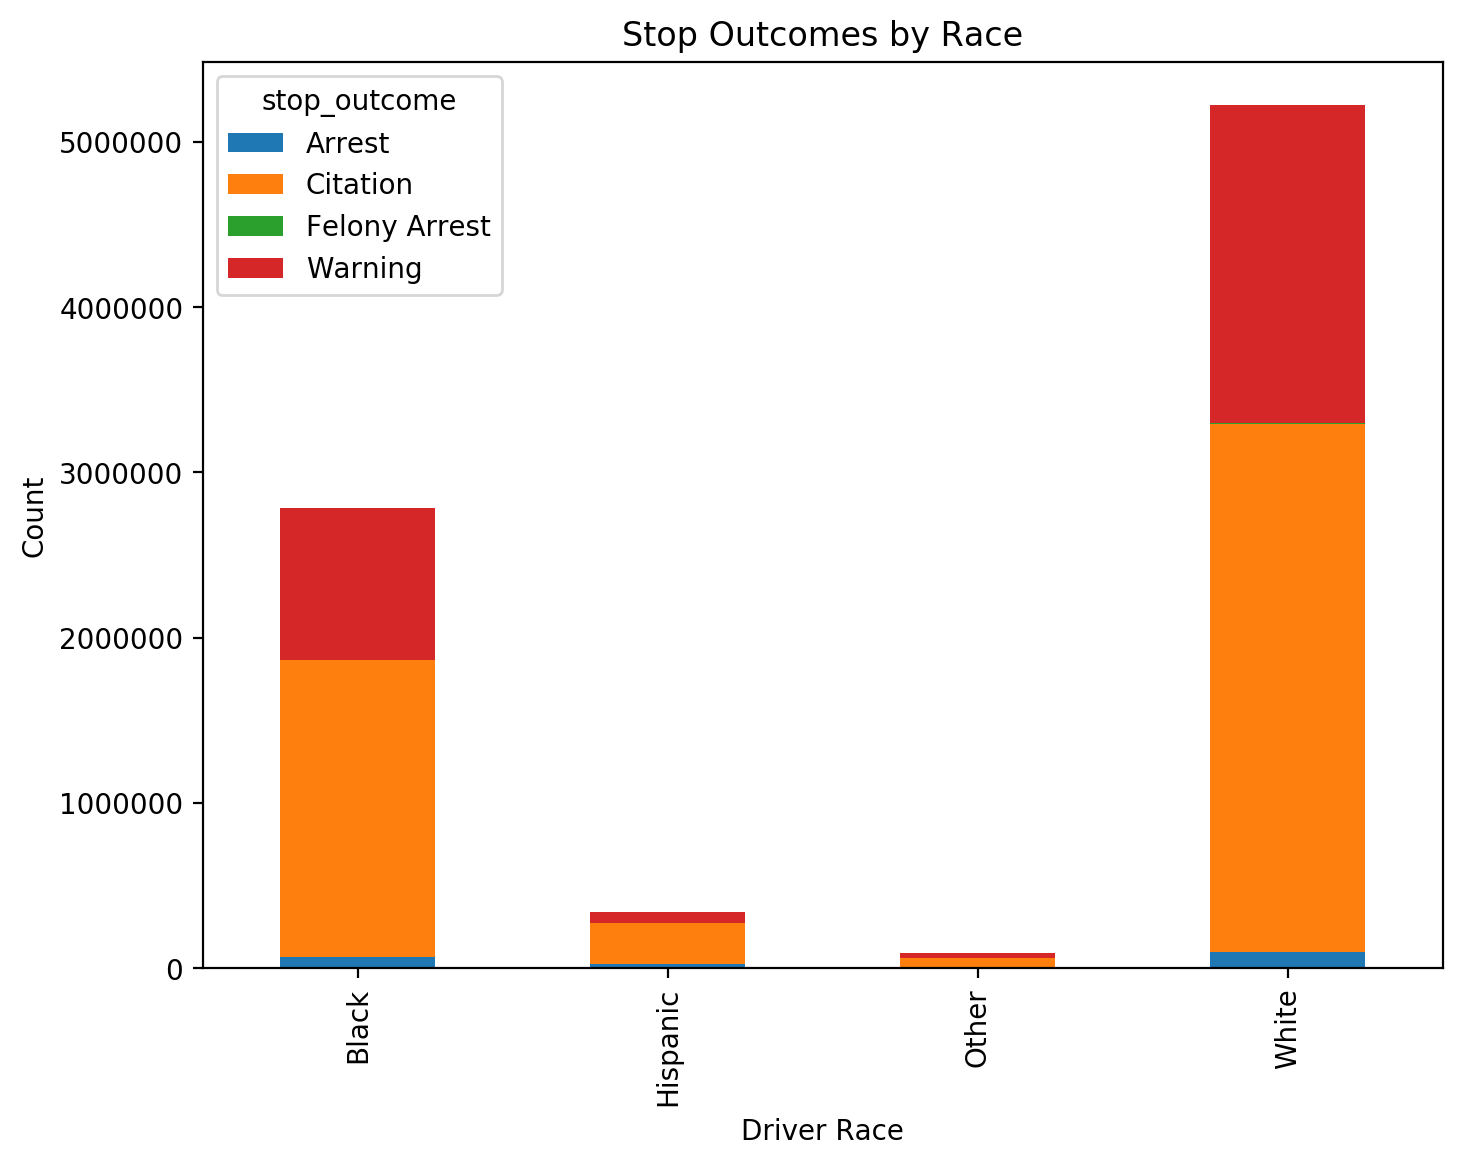

In [161]:
race_outcome = summary.reset_index().groupby(["driver_race", "stop_outcome"]).sum().unstack()
del race_outcome["year"]
race_outcome.columns = race_outcome.columns.droplevel()
fig, ax = plt.subplots(figsize=(8,6), dpi=200)
race_outcome.plot(kind="bar", stacked=True, ax=ax)
ax.set_xlabel("Driver Race")
ax.set_ylabel("Count")
ax.set_title("Stop Outcomes by Race")


In [151]:
fig.savefig("../output/race_outcome.png", bbox_inches="tight")


Text(0.5,1,'Stop Outcome Percentage by Race')

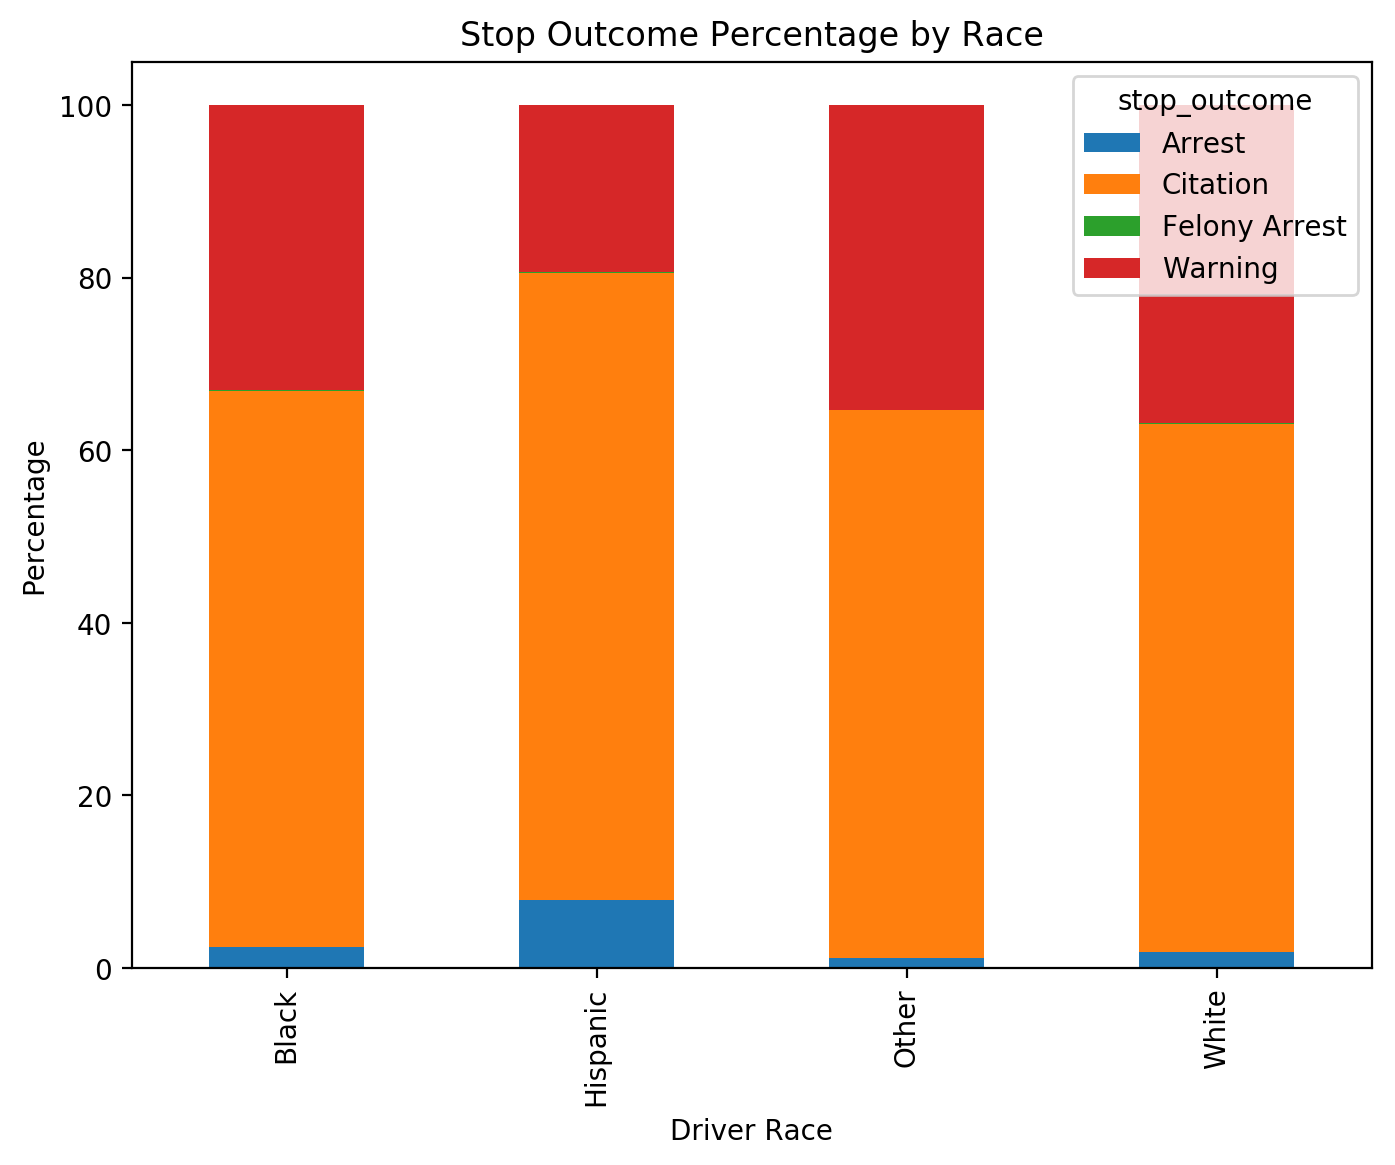

In [198]:
race_outcome = summary.reset_index().groupby(["driver_race", "stop_outcome"]).sum().unstack()
race_totals = summary.reset_index().groupby(["driver_race"]).sum()
del race_totals["year"]
del race_outcome["year"]
race_outcome.columns = race_outcome.columns.droplevel()
for cat in race_outcome.columns.categories:
    race_outcome[cat] /= race_totals["count"]
    race_outcome[cat] *= 100
fig, ax = plt.subplots(figsize=(8,6), dpi=200)
race_outcome.plot(kind="bar", stacked=True, ax=ax)
ax.set_xlabel("Driver Race")
ax.set_ylabel("Percentage")
ax.set_title("Stop Outcome Percentage by Race")


In [197]:
fig.savefig("../output/race_outcome_perc.png", bbox_inches="tight")


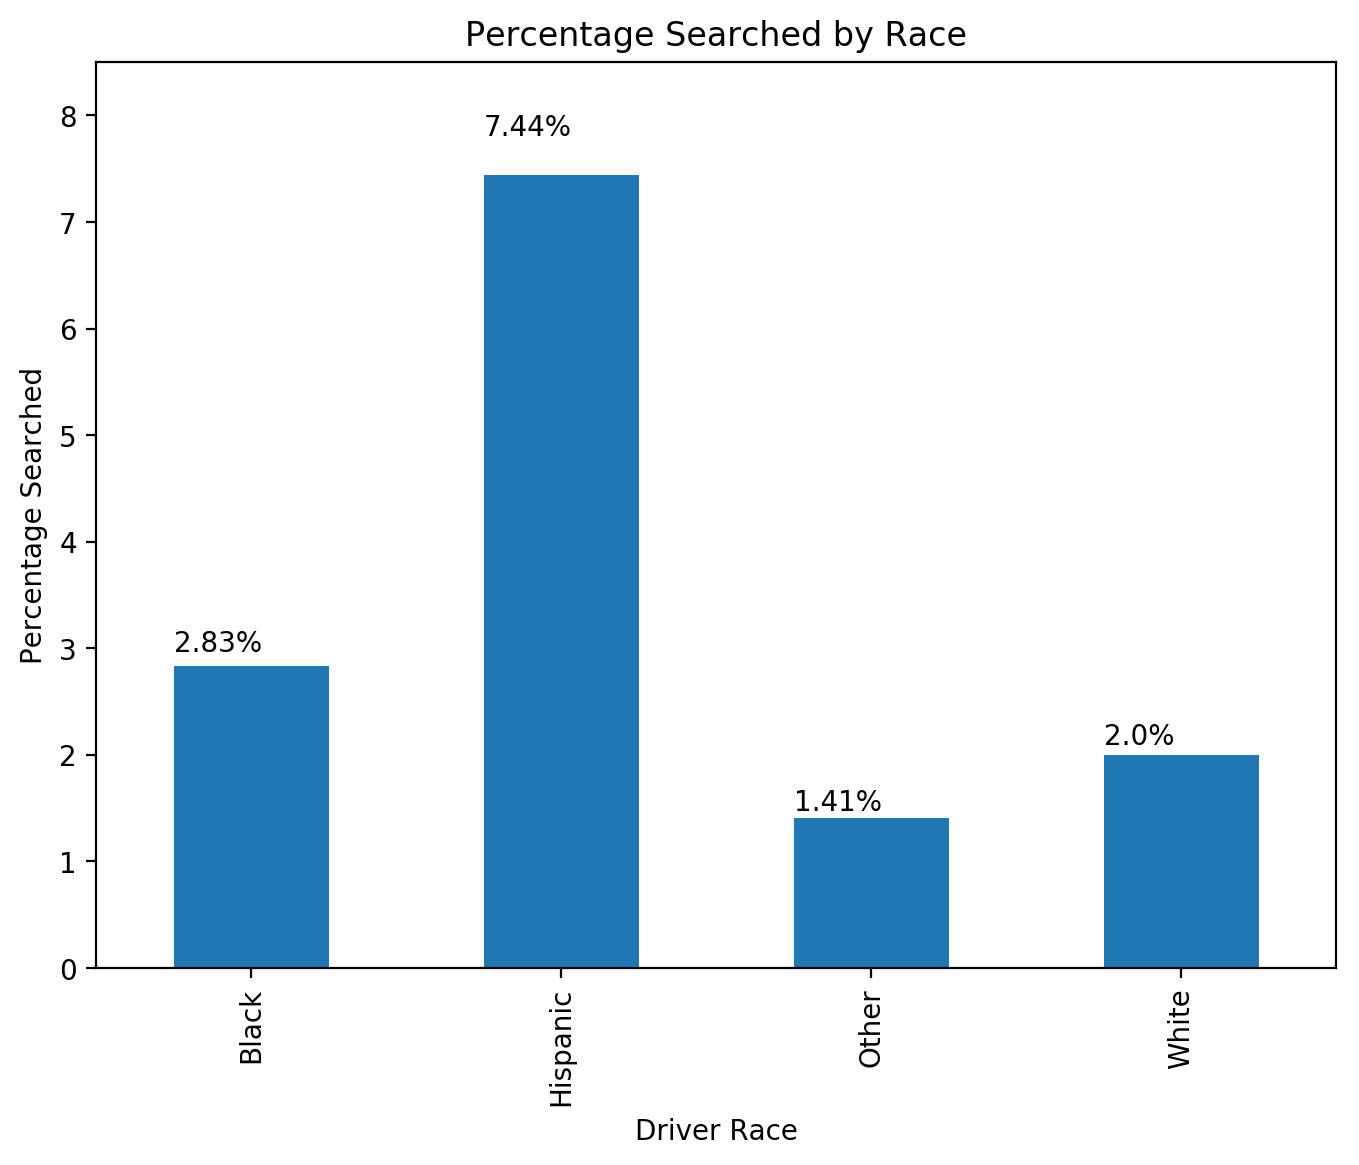

In [192]:
race_search = summary.reset_index().groupby(["driver_race", "search_conducted"]).sum().unstack()
del race_search["year"]
race_search.columns = race_search.columns.droplevel().categories
race_search["perc"] = race_search["TRUE"] / (race_search["FALSE"] + race_search["TRUE"]) * 100
fig, ax = plt.subplots(figsize=(8,6), dpi=200)
race_search["perc"].plot(kind="bar", ax=ax)
ax.set_xlabel("Driver Race")
ax.set_ylabel("Percentage Searched")
ax.set_title("Percentage Searched by Race")
ax.set_ylim((0,8.5))
for p in ax.patches:
    ax.annotate("{:.3}%".format(p.get_height()), (p.get_x(), p.get_height() * 1.05))

In [193]:
fig.savefig("../output/stop_percentage.png", bbox_inches="tight")